### Decision Trees and Ensemble Learning
- This is about decision trees and tree-based ensemble algorithms
- Credit risk scoring project
- Dataset: https://github.com/gastonstat/CreditScoring

### Data cleaning and preparation
- Downloading or getting the dataset
- Re-encoding categorical variables
- Doing the train/validation/test split

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [3]:

url = "https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv"
df = pd.read_csv(url)
df.head()


,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [6]:
df.dtypes

status       int64
seniority    int64
home         int64
time         int64
age          int64
marital      int64
records      int64
job          int64
expenses     int64
income       int64
assets       int64
debt         int64
amount       int64
price        int64
dtype: object

In [7]:
df.shape

(4455, 14)

#### Decoding the categorical columns so it can be meanfull for reading.

- Each category starts at 1 with the first value in tuple, increments sequentially, and 0 is reserved for 'unk' (unknown).

In [8]:
# Status mapping
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}
df.status = df.status.map(status_values)

# Home mapping
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'priv',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}
df.home = df.home.map(home_values)

# Marital mapping
marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}
df.marital = df.marital.map(marital_values)

# Records mapping
records_values = {
    1: 'no_rec',
    2: 'yes_rec',
    0: 'unk'
}
df.records = df.records.map(records_values)

# Job mapping
job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}
df.job = df.job.map(job_values)

In [9]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no_rec,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no_rec,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes_rec,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no_rec,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no_rec,fixed,46,107,0,0,310,910


In [10]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


- The above dataframe shows we 3 column with missing values(99999999.0)

In [11]:
# Replace placeholder values (99999999) with NaN (missing values) in specific numeric columns.

for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [12]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [13]:

# Removes rows with unknown/missing target values (Can't train a model if we don't know the correct answer)
# Cleans  dataset for modeling
# Resets index so row numbers are continuous (0, 1, 2...) instead of (0, 2, 4...)

df = df[df.status != 'unk'].reset_index(drop = True)

In [14]:
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no_rec,freelance,73,129.0,0.0,0.0,800,846
1,ok,17,rent,60,58,widow,no_rec,fixed,48,131.0,0.0,0.0,1000,1658
2,default,10,owner,36,46,married,yes_rec,freelance,90,200.0,3000.0,0.0,2000,2985
3,ok,0,rent,60,24,single,no_rec,fixed,63,182.0,2500.0,0.0,900,1325
4,ok,0,rent,36,26,single,no_rec,fixed,46,107.0,0.0,0.0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4449,default,1,rent,60,39,married,no_rec,fixed,69,92.0,0.0,0.0,900,1020
4450,ok,22,owner,60,46,married,no_rec,fixed,60,75.0,3000.0,600.0,950,1263
4451,default,0,owner,24,37,married,no_rec,partime,60,90.0,3500.0,0.0,500,963
4452,ok,0,rent,48,23,single,no_rec,freelance,49,140.0,0.0,0.0,550,550


In [15]:
from sklearn.model_selection import train_test_split

# First split: separate test set (20%) from full training set (80%)
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

# Second split: separate training set (60%) from validation set (20%)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

# Reset indices for all splits
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)



In [16]:
df_full_train

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
1034,ok,5,priv,60,24,married,no_rec,fixed,45,127.0,2000.0,0.0,1000,1282
3955,ok,14,parents,60,32,married,yes_rec,fixed,35,140.0,0.0,0.0,1150,1273
398,ok,25,owner,12,43,married,no_rec,freelance,75,250.0,100000.0,0.0,600,841
3994,ok,18,rent,60,37,married,no_rec,fixed,70,100.0,0.0,0.0,1300,1345
1355,default,1,parents,48,24,single,yes_rec,fixed,35,65.0,0.0,0.0,900,1061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,ok,31,owner,48,57,married,yes_rec,freelance,60,230.0,19400.0,1781.0,600,887
2763,ok,19,owner,60,46,married,no_rec,freelance,60,190.0,7000.0,0.0,1500,2755
905,ok,15,owner,60,55,married,no_rec,freelance,60,0.0,6500.0,3650.0,1200,1710
3980,ok,12,rent,48,36,married,no_rec,fixed,80,195.0,0.0,0.0,1800,2272


In [17]:
# Extract target variable (y) from each split
# Use 'bad' instead of 'default' as the positive class
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [18]:
# Remove target column from training dataframes
del df_train['status']
del df_val['status']
del df_test['status']

In [19]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,12,priv,24,28,married,no_rec,fixed,45,102.0,NaN,NaN,700,1229
1,4,other,60,28,married,no_rec,fixed,60,143.0,0.0,0.0,1150,1630
2,0,owner,60,27,married,no_rec,fixed,35,295.0,6000.0,0.0,1950,2208
3,6,owner,48,28,married,no_rec,fixed,45,114.0,3500.0,0.0,650,1255
4,12,owner,36,42,married,no_rec,freelance,60,0.0,15000.0,0.0,1000,1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,0,rent,48,54,married,no_rec,freelance,135,0.0,0.0,0.0,2000,2476
2668,6,rent,12,33,married,no_rec,fixed,85,250.0,0.0,0.0,500,1500
2669,9,parents,60,32,single,yes_rec,fixed,35,105.0,0.0,0.0,1490,1490
2670,0,parents,60,21,single,no_rec,others,35,149.0,3000.0,0.0,1400,1829


#### Decision trees
- How a decision tree looks like
- Training a decision tree
- Overfitting
- Controlling the size of a tree

In [20]:
# A Functin representing decision tree(Manual)
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'

In [21]:
xi = df_train.iloc[0].to_dict()
assess_risk(xi)

'default'

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

train_dicts  = df_train.fillna(0).to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [23]:
# Validation set
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)
# Output: 0.6393 is a Poor performance
# Poor at predicting default risk on new applications

0.6280204197390812

In [24]:
# Training set
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)
# Output: 1.0 is a Perfect (overfitted)
# Model memorized all training loans/applications

1.0

- That results happned because the max depth was too deep. By reducing the depth, we are likely getting better performance.

In [25]:

dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.7295775678019526
val: 0.7108180500409655


In [26]:
from sklearn.tree import export_text

print(export_text(dt, feature_names=dv.get_feature_names_out()))

# Below is the textual representation of a trained Decision Tree from scikit-learn using
# It prints the logic the tree learned for classification.

|--- income <= 89.50
|   |--- seniority <= 2.50
|   |   |--- class: 1
|   |--- seniority >  2.50
|   |   |--- class: 0
|--- income >  89.50
|   |--- records=no_rec <= 0.50
|   |   |--- class: 0
|   |--- records=no_rec >  0.50
|   |   |--- class: 0



### Decision Tree Learning Algorithm

In [27]:
# Univariate data
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [28]:
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
4,5000,ok
3,5000,ok
0,8000,default
6,9000,ok


In [29]:
Ts = [0, 2000, 3000, 4000, 5000, 8000]

from IPython.display import display
T = 4000
df_left = df_example[df_example.assets <= T]
df_right = df_example[df_example.assets > T]

display(df_left)
print(df_left.status.value_counts(normalize=True))
display(df_right)
print(df_left.status.value_counts(normalize=True))

,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


In [30]:
# T = thresholds
# printing out the decision for each threshold
for T in Ts:
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]
    
    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))

    print()

0


,assets,status
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,status
1,2000,default
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,status
1,2000,default
2,0,default
7,3000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,status
0,8000,default
6,9000,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,status
6,9000,ok


status
ok    1.0
Name: proportion, dtype: float64



In [31]:
# Multivariate data
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [32]:
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
3,5000,1000,ok
2,0,1000,default
5,4000,1000,ok
4,5000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [33]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
}
# just to understand what is going on for items() if you use a dictionary
# the dictionary is converted into a dict_items()
# from here, you are able to get the feature followed by the Ts
# e.g. feature = assets, T = [0, 2000, 3000, 4000, 5000, 8000], etc. 
print(thresholds.items())

dict_items([('assets', [0, 2000, 3000, 4000, 5000, 8000]), ('debt', [500, 1000, 2000])])


In [34]:
for feature, Ts in thresholds.items():
    print('#####################')
    print(feature)
    for T in Ts:
        print(T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]

        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))

        print()
    print('#####################')

#####################
assets
0


,assets,debt,status
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64

#####################
#####################
debt
500


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default


status
default    1.0
Name: proportion, dtype: float64

#####################


#### Decision Tree Learning Algorithm (Simple Explanation)

##### A decision tree learns rules by repeatedly splitting the data into smaller and purer groups.  
##### Here is the process in simple steps:


## 1. Find the Best Split
- Look at all features.
- Try different possible split points.
- Choose the split that separates the classes best.


## 2. Stop if You Hit the Maximum Depth
- If the tree has grown to the allowed depth, stop splitting.
- Mark the node as a leaf (final prediction).


## 3. Work on the Left Side
- After choosing a split, check the group of samples that go to the **left**.
- If this left group:
- Has enough samples  
- Still has mixed classes (not pure)  
- Then repeat the splitting process on this left group.


## 4. Work on the Right Side
- Do the same for the **right** group.
- If the right side has enough samples and is not pure:
 - Continue splitting it further.


## The Splitting Stops When:
- A node becomes pure (all samples are the same class), **OR**
- The node has too few samples to split, **OR**
- The maximum depth is reached.


## Final Output
- Internal nodes = decision rules (e.g., *income > 90?*)
- Leaf nodes = final predictions (e.g., *class 0 or class 1*)



### Decision trees parameter tuning
- selecting max_depth
- selecting min_samples_leaf

In [38]:
DecisionTreeClassifier()

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [ ]:
# We can actually tune the parameters for decision trees such that they give us a better RMSE/AUC/metric score
# Depth basically means the number of splits in the decision tree itself
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))


    # We can tell that depths 4-6 give us the best AUC score 
    # However, the best of them all is 4 which has the highest auc score.

   1 -> 0.616
   2 -> 0.711
   3 -> 0.752
   4 -> 0.773
   5 -> 0.765
   6 -> 0.736
  10 -> 0.660
  15 -> 0.650
  20 -> 0.637
None -> 0.639


In [43]:
# min_samples_leaf means the number of datapoints in a split needed for the next split to happen
# if there are not enough datapoints, the split won't happen at all 
scores = []

for depth in [4, 5, 6]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [44]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)


In [45]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.773  0.765  0.736
5                 0.777  0.775  0.750
10                0.778  0.776  0.759
15                0.777  0.780  0.783
20                0.777  0.779  0.782
100               0.777  0.774  0.782
200               0.762  0.762  0.762
500               0.687  0.687  0.687

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

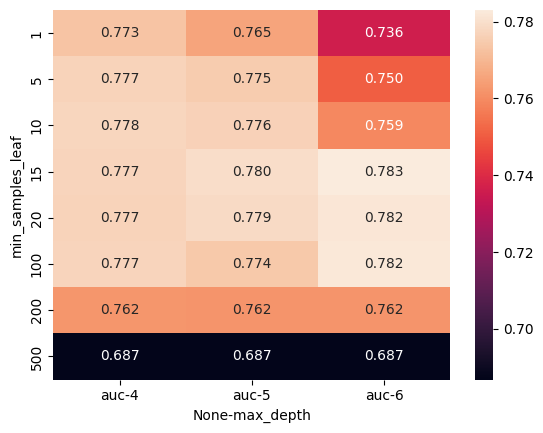

In [ ]:
import seaborn as sns
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

# Smaller depth + moderate leaf size is best
# Peak AUC is around:

# max_depth: 5 or 6
# min_samples_leaf: 15–20
# AUC ≈ 0.783

#This is very normal for credit scoring.

In [50]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,15
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None
